## Time-series based analysis of Earthquake Risk Factors

### Part 3: Performing EDA on the pickled reddit dataset

In this notebook, I explore several aspects of the dataframe and also prepare the dataframe objects for further modeling.

Importing the required libraries:

In [26]:
import requests
import json
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle

## for geospatial
import folium
import geopy
## for deep learning
import minisom

## for machine learning
from sklearn import preprocessing, cluster

### Part 2.1: Importing the saved clean data from loma prieta earthquake

In [27]:
file_path = "../datasets/" + "eq_loma_prieta" + "_clean" + ".csv"

df_lp = pd.read_csv(file_path)
df_lp.drop(columns = "Unnamed: 0", inplace = True)

df_lp.set_index('time', inplace=True)

df_lp.index = pd.to_datetime(df_lp.index)


df_lp.head()

,index,type,mag,place,status,tsunami,sig,net,nst,dmin,rms,gap,magType,longitude,latitude,depth
time,,,,,,,,,,,,,,,,
1989-10-18 23:52:57.010,0,earthquake,1.42,Northern California,reviewed,0,31,nc,11.0,0.02342,0.03,70.0,md,-121.945167,37.148333,6.129
1989-10-18 23:50:19.750,1,earthquake,1.85,Northern California,reviewed,0,53,nc,22.0,0.02523,0.05,74.0,md,-121.723333,36.965000,13.466
1989-10-18 23:42:27.610,2,earthquake,1.98,Northern California,reviewed,0,60,nc,35.0,0.02973,0.07,55.0,md,-122.032833,37.194500,11.406
1989-10-18 23:37:54.640,3,earthquake,2.09,Northern California,reviewed,0,67,nc,28.0,0.02252,0.05,69.0,md,-121.854167,37.092500,7.679
1989-10-18 23:33:41.010,4,earthquake,1.65,Northern California,reviewed,0,42,nc,17.0,0.03423,0.07,59.0,md,-121.636333,36.985500,0.856


Checking for datatypes or missing values!

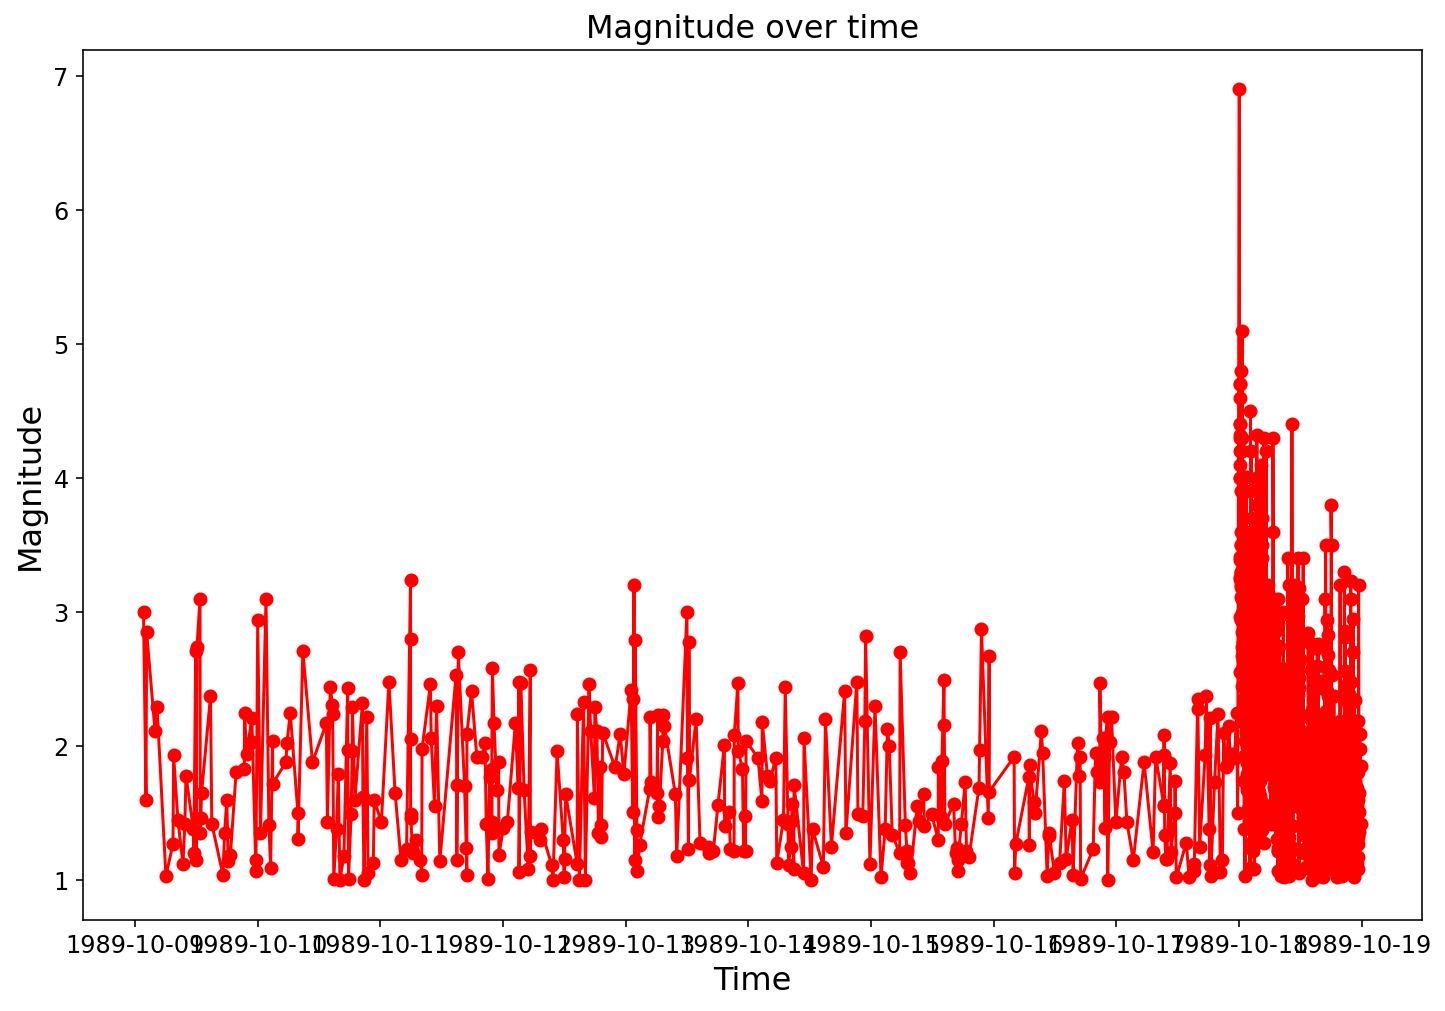

In [28]:
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(12,8))
plt.plot(df_lp["mag"], 'o-', c = "red")

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Magnitude', fontsize=16)

plt.title('Magnitude over time', fontsize=16);

Figure suggests that the main shock, which had magnitude of 7 was just a spike in magnitude domain!

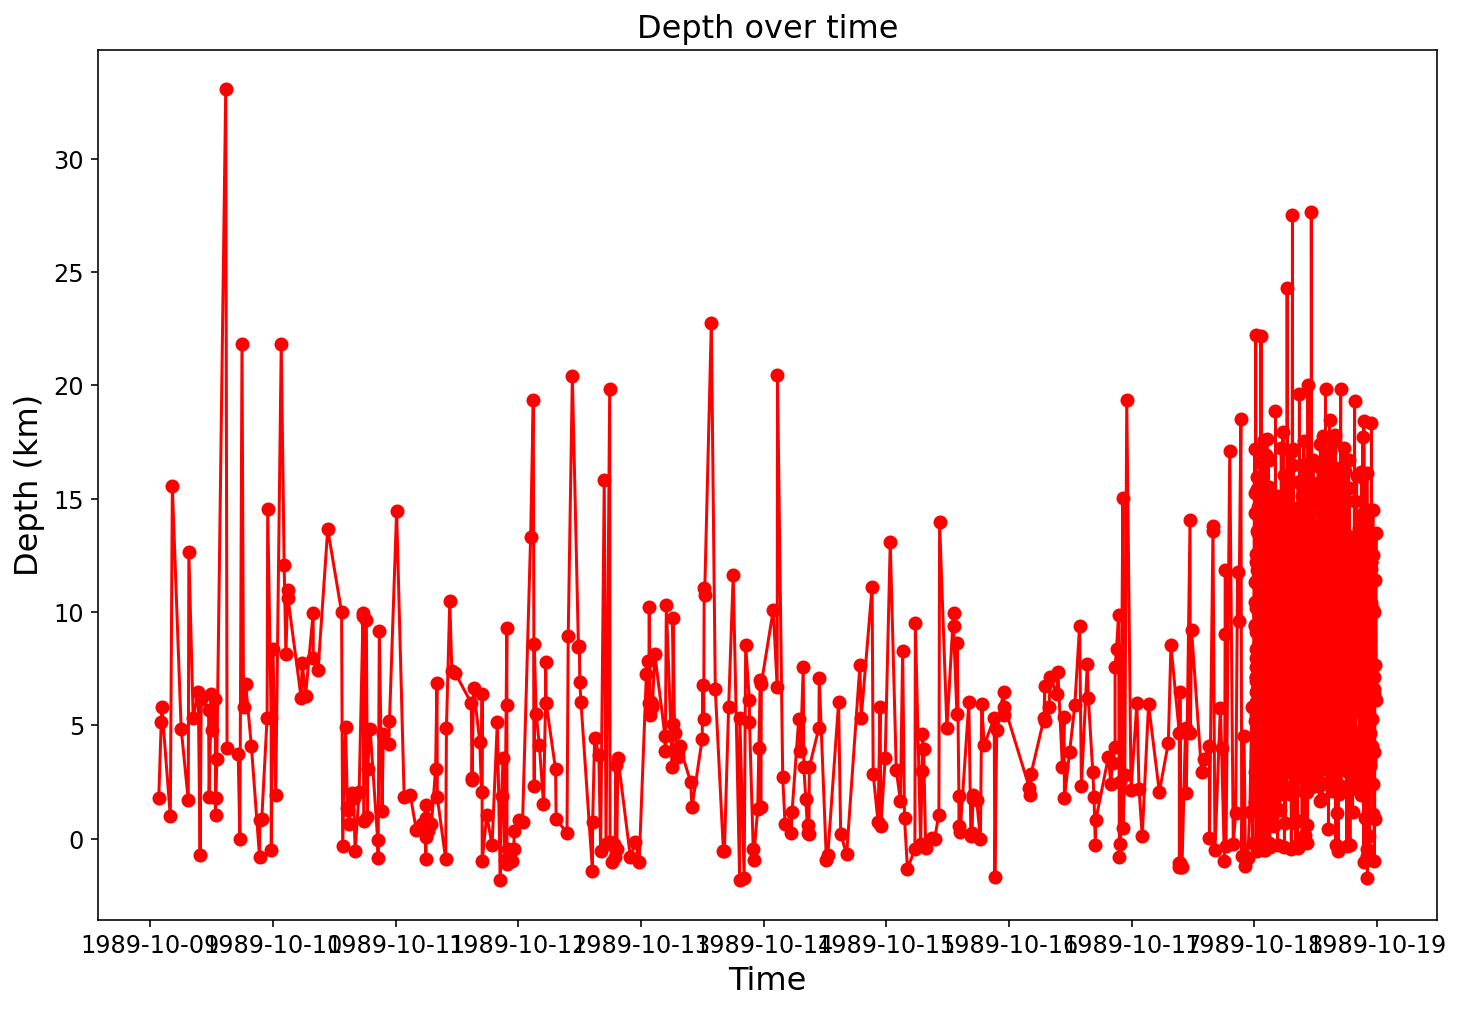

In [29]:
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(12,8))
plt.plot(df_lp["depth"], 'o-', c = "red")

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Depth (km)', fontsize=16)
plt.title('Depth over time', fontsize=16);

Same goes for depth!

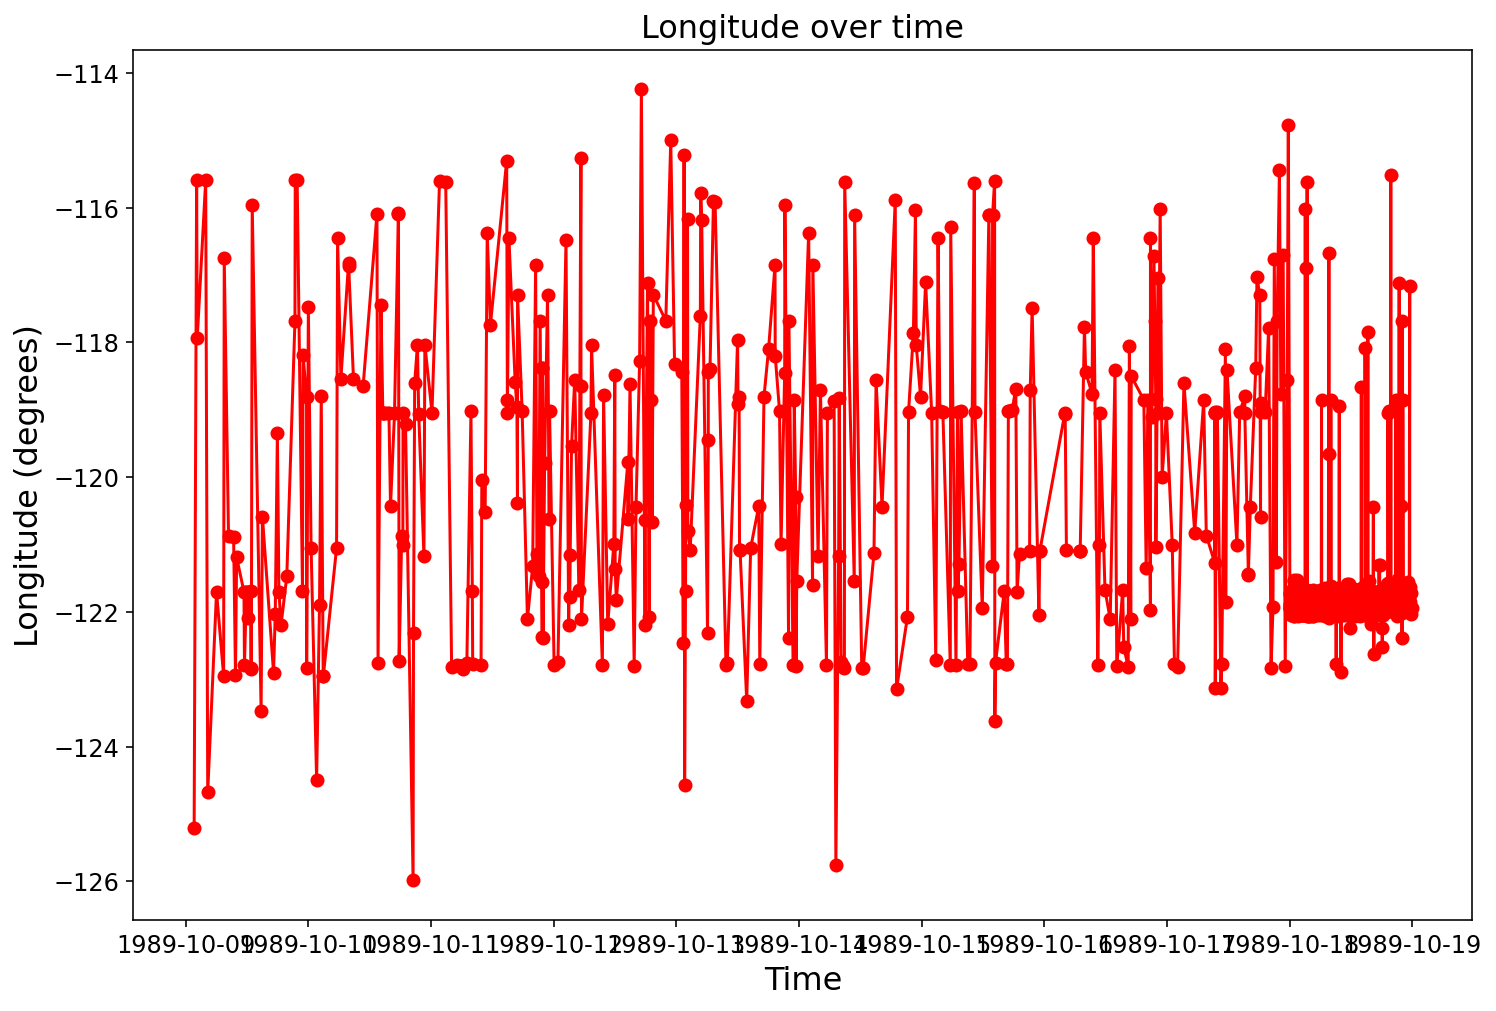

In [30]:
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(12,8))
plt.plot(df_lp["longitude"], 'o-', c = "red")

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Longitude (degrees)', fontsize=16)
plt.title('Longitude over time', fontsize=16);

Same goes for Longitude!

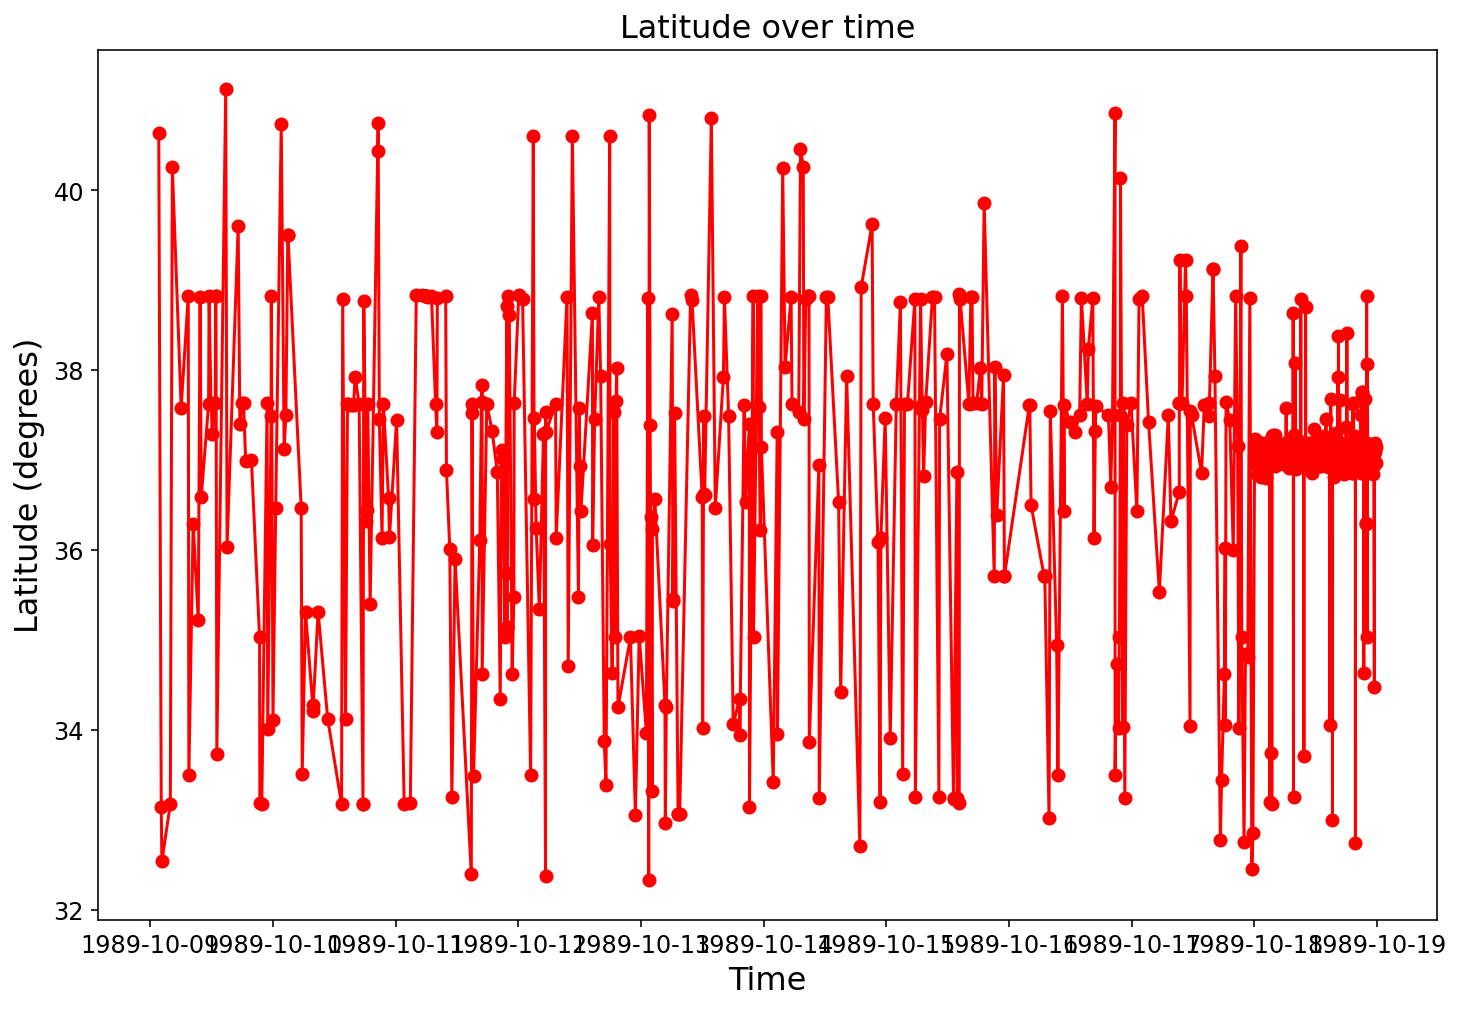

In [31]:
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(12,8))
plt.plot(df_lp["latitude"], 'o-', c = "red")

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Latitude (degrees)', fontsize=16)
plt.title('Latitude over time', fontsize=16);

Same goes for depth!

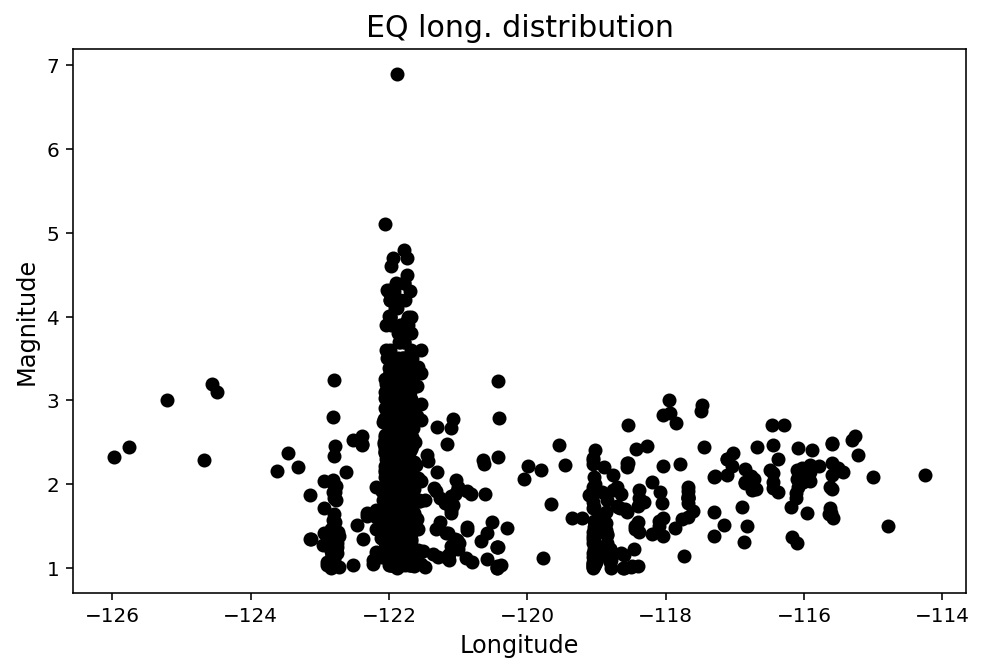

In [32]:
plt.figure(figsize = [8, 5])

plt.scatter(df_lp["longitude"], df_lp["mag"], color="black");

# Format title and axis labels
plt.title("EQ long. distribution", fontsize = 15);

plt.xlabel("Longitude", fontsize = 12);
plt.ylabel("Magnitude", fontsize = 12);

In addition to the main fault activites, there was a parallel fault (presumably) active as well!

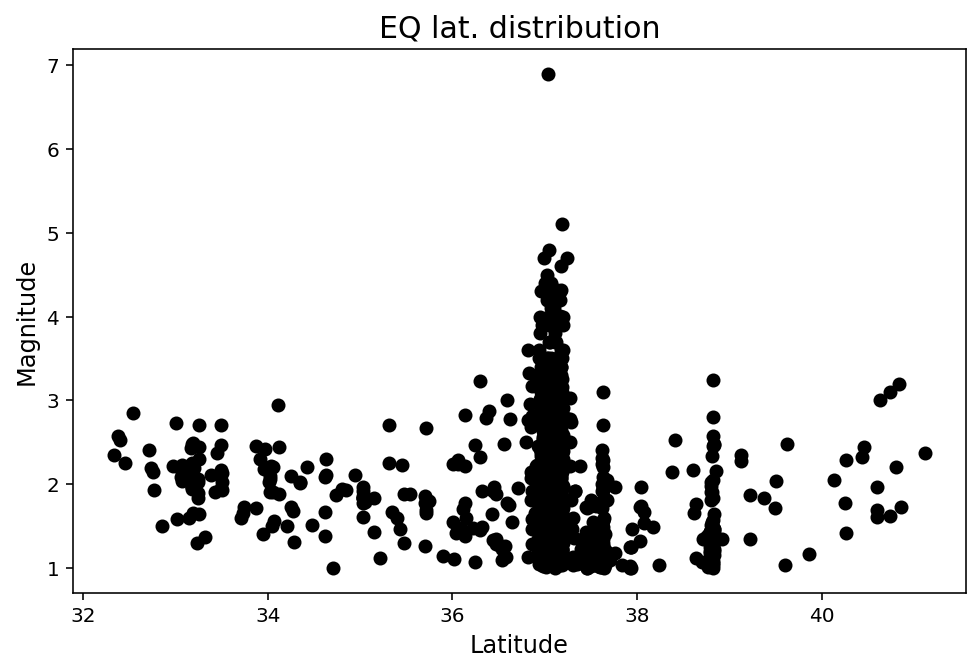

In [33]:
plt.figure(figsize = [8, 5])

plt.scatter(df_lp["latitude"], df_lp["mag"], color="black");

# Format title and axis labels
plt.title("EQ lat. distribution", fontsize = 15);

plt.xlabel("Latitude", fontsize = 12);
plt.ylabel("Magnitude", fontsize = 12);

In addition to the main fault activites, there was a parallel fault (presumably) active as well!

### Now, looking at tempral earthquake focus points

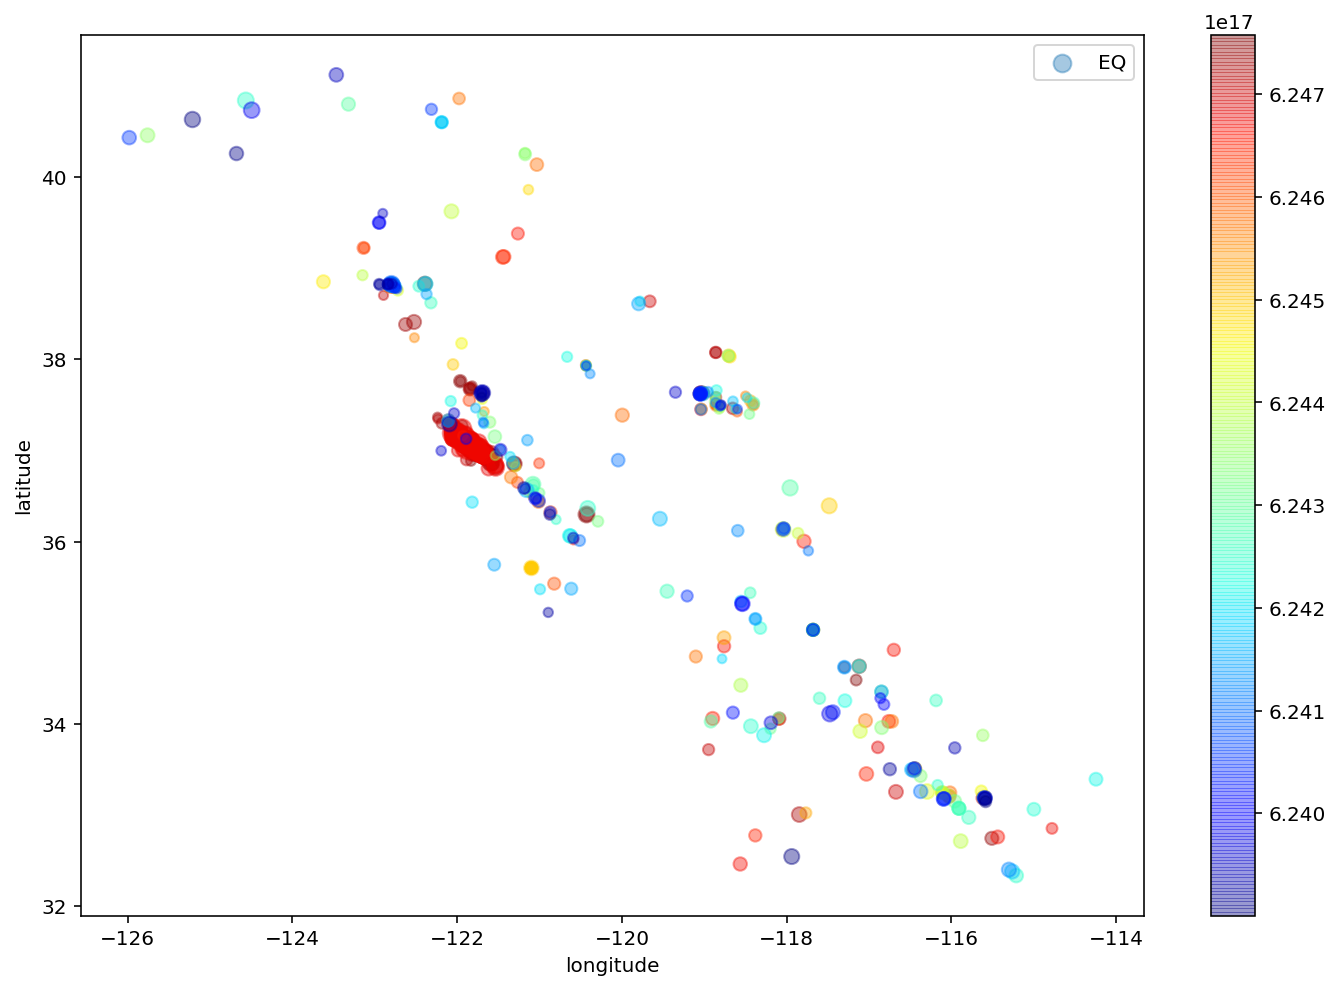

In [34]:
ax = plt.gca()

df_lp.plot(kind="scatter", x="longitude", y="latitude",
    s=df_lp['mag']/0.05, label="EQ",
    c=df_lp.index, cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7), ax = ax
)
plt.legend()

plt.savefig("../plots/EDA_long_lat.png")


plt.tight_layout()

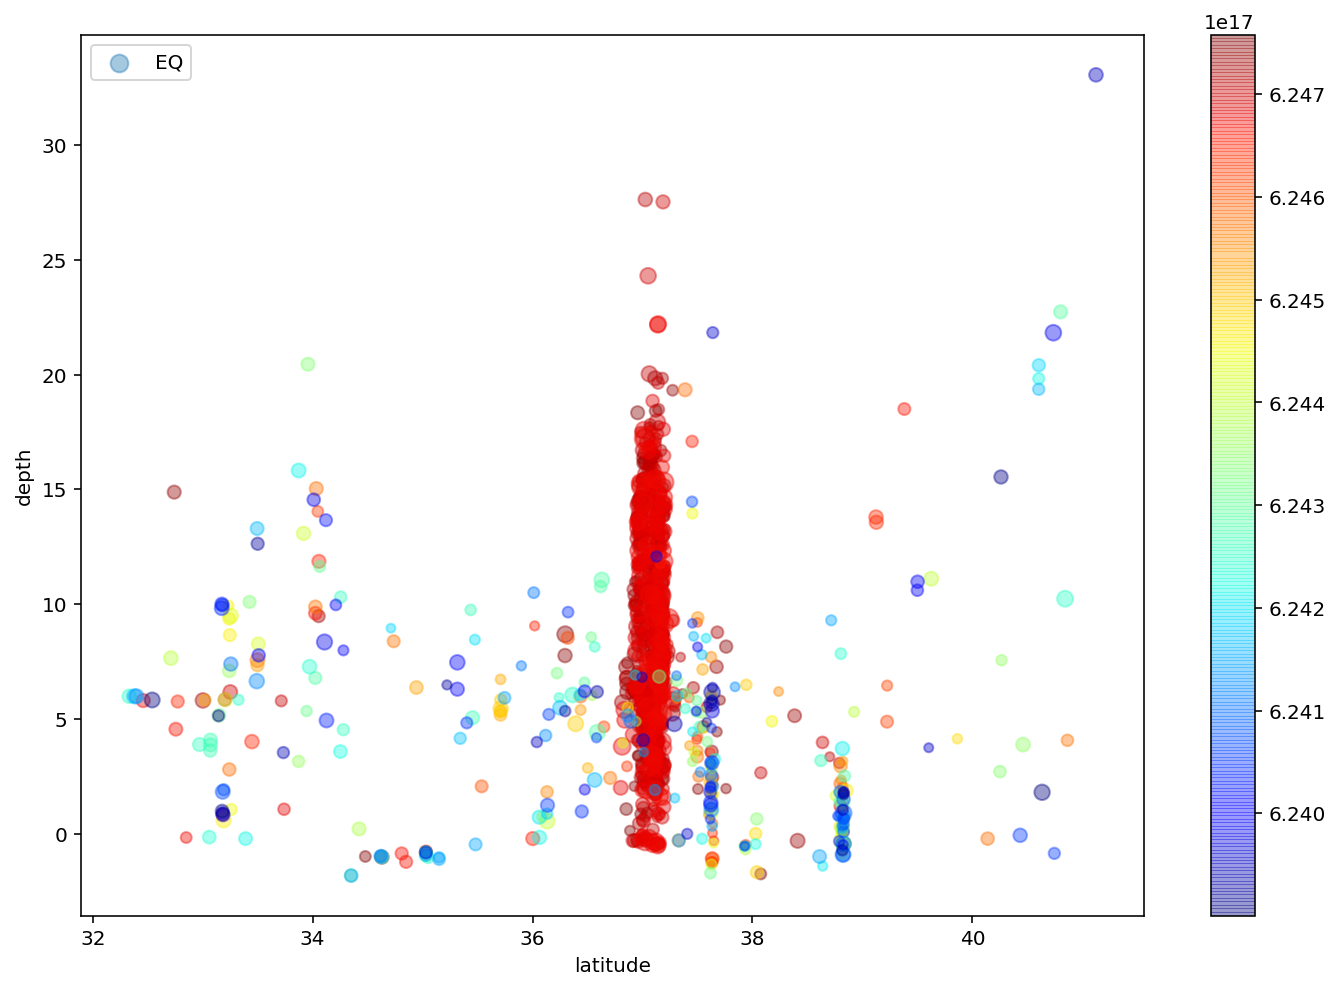

In [35]:
ax = plt.gca()

df_lp.plot(kind="scatter", x="latitude", y="depth",
    s=df_lp['mag']/0.05, label="EQ",
    c=df_lp.index, cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7), ax = ax
)
plt.legend()

plt.savefig("../plots/EDA_depth_lat.png")


plt.tight_layout()

In [36]:
df_lp.head()

,index,type,mag,place,status,tsunami,sig,net,nst,dmin,rms,gap,magType,longitude,latitude,depth
time,,,,,,,,,,,,,,,,
1989-10-18 23:52:57.010,0,earthquake,1.42,Northern California,reviewed,0,31,nc,11.0,0.02342,0.03,70.0,md,-121.945167,37.148333,6.129
1989-10-18 23:50:19.750,1,earthquake,1.85,Northern California,reviewed,0,53,nc,22.0,0.02523,0.05,74.0,md,-121.723333,36.965000,13.466
1989-10-18 23:42:27.610,2,earthquake,1.98,Northern California,reviewed,0,60,nc,35.0,0.02973,0.07,55.0,md,-122.032833,37.194500,11.406
1989-10-18 23:37:54.640,3,earthquake,2.09,Northern California,reviewed,0,67,nc,28.0,0.02252,0.05,69.0,md,-121.854167,37.092500,7.679
1989-10-18 23:33:41.010,4,earthquake,1.65,Northern California,reviewed,0,42,nc,17.0,0.03423,0.07,59.0,md,-121.636333,36.985500,0.856


## Plotting the earthquake data on folium

In [37]:
# Source: https://towardsdatascience.com/clustering-geospatial-data-f0584f0b04ec

city = "California"
## get location
locator = geopy.geocoders.Nominatim(user_agent="MyCoder")
location = locator.geocode(city)
print(location)
## keep latitude and longitude only
location = [location.latitude, location.longitude]
print("[lat, long]:", location)

x, y = "latitude", "longitude"
color = "time"
size = "mag"
popup = "Street Address"
data = df_lp.copy()

## create color column
lst_colors=["black"]
data["color"] = "black"
lst_elements = sorted(list(data["color"].unique()))

## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)




## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=7)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], popup=None,
           color=row["color"], fill=True,
           radius=row["size"]).add_to(map_), axis=1)
## add html legend
legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle 
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))

## plot the map
map_



California, United States of America
[lat, long]: [36.7014631, -118.7559974]


In [39]:
df_lp.head()

,index,type,mag,place,status,tsunami,sig,net,nst,dmin,rms,gap,magType,longitude,latitude,depth
time,,,,,,,,,,,,,,,,
1989-10-18 23:52:57.010,0,earthquake,1.42,Northern California,reviewed,0,31,nc,11.0,0.02342,0.03,70.0,md,-121.945167,37.148333,6.129
1989-10-18 23:50:19.750,1,earthquake,1.85,Northern California,reviewed,0,53,nc,22.0,0.02523,0.05,74.0,md,-121.723333,36.965000,13.466
1989-10-18 23:42:27.610,2,earthquake,1.98,Northern California,reviewed,0,60,nc,35.0,0.02973,0.07,55.0,md,-122.032833,37.194500,11.406
1989-10-18 23:37:54.640,3,earthquake,2.09,Northern California,reviewed,0,67,nc,28.0,0.02252,0.05,69.0,md,-121.854167,37.092500,7.679
1989-10-18 23:33:41.010,4,earthquake,1.65,Northern California,reviewed,0,42,nc,17.0,0.03423,0.07,59.0,md,-121.636333,36.985500,0.856


## What happens to EQ cycle every one hour ?

Text(0, 0.5, 'Magnitude')

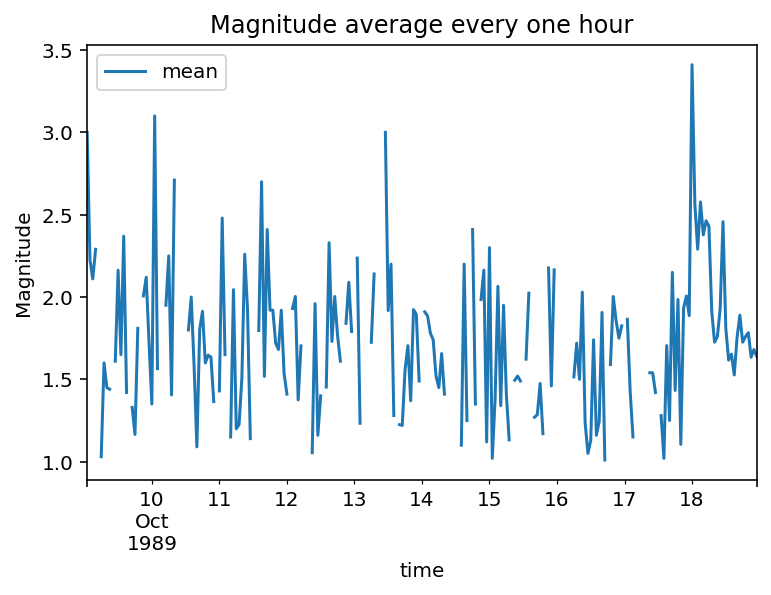

In [49]:
df_lp["mag"].resample("1H").apply([np.mean]).plot()
plt.title("Magnitude average every one hour")
plt.ylabel("Magnitude")

Text(0, 0.5, 'Magnitude')

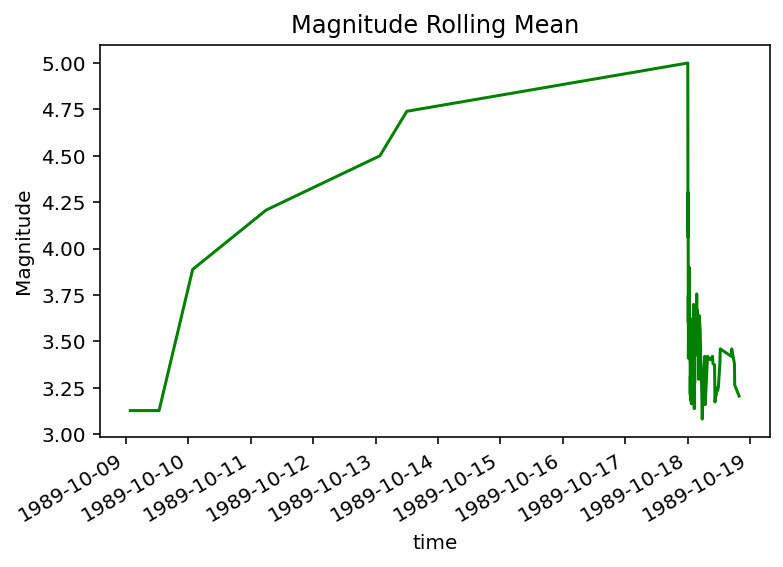

In [52]:
# Pandas series with magnitudes greater than 3.0
magn3 = df_lp.loc[df_lp["mag"] >= 3.0, "mag"]

pd.Series.rolling(magn3, window=5).mean().plot(style="-g")
plt.title("Magnitude Rolling Mean")
plt.ylabel("Magnitude")

Text(0.5, 0, 'Depth/Km')

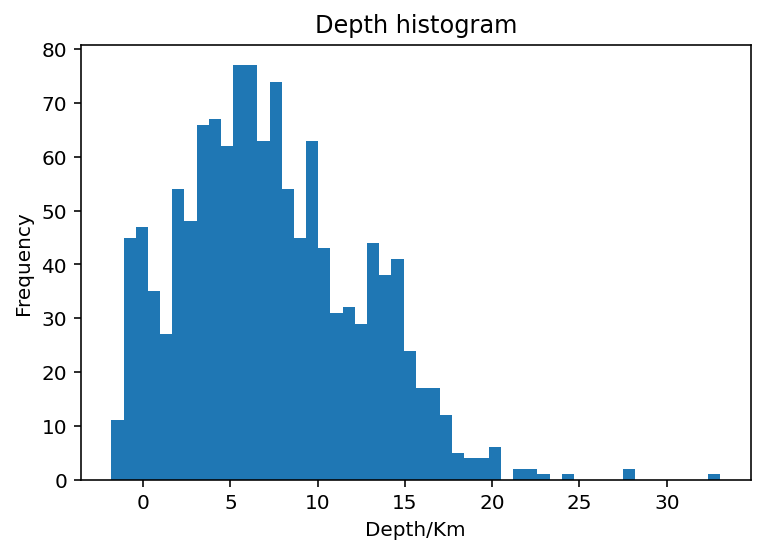

In [55]:
plt.figure()

depth = df_lp["depth"]
depth.plot(kind="hist", stacked=True, bins=50)

plt.title("Depth histogram")
plt.xlabel("Depth/Km")

Text(0.5, 0, 'Magnitude')

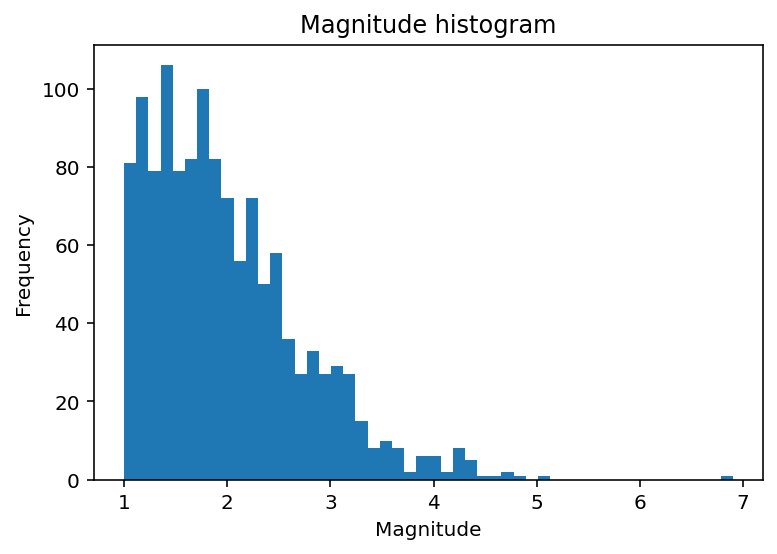

In [59]:
plt.figure()

depth = df_lp["mag"]
depth.plot(kind="hist", stacked=True, bins=50)

plt.title("Magnitude histogram")
plt.xlabel("Magnitude")

In [25]:
print("Hello World!")

Hello World!
